

#HEART DISEASE PREDICTION AND ANALYSIS

**Scenario:**

 You have just been hired as a Data Scientist at a Hospital with an alarming number of patients coming in reporting various cardiac symptoms.A cardiologist measures vitals & hands you this data to perform Data Analysis and predict whether certain patients have Heart Disease. We would like to make a Machine Learning algorithm where we can train our AI to learn & improve from experience. Thus, we would want to classify patients as either positive or negative for Heart Disease.

**Goal:**

Predict whether a patient should be diagnosed with Heart Disease. This is a binary outcome.

Positive (+) = 1, patient diagnosed with Heart Disease

Negative (-) = 0, patient not diagnosed with Heart Disease


**Features & Predictor:**

Our Predictor (Y, Positive or Negative diagnosis of Heart Disease) is determined by 13 features (X):

1. age (#)
2. sex : 1= Male, 0= Female (Binary)
3. (cp)chest pain type (4 values -Ordinal):Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic
4. (trestbps) resting blood pressure (#)
5. (chol) serum cholesterol in mg/dl (#)
6. (fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)
7. (restecg) resting electrocardiography results(values 0,1,2)
8. (thalach) maximum heart rate achieved (#)
9. (exang) exercise induced angina (binary) (1 = yes; 0 = no)
10. (oldpeak) = ST depression induced by exercise relative to rest (#)
11. (slope) of the peak exercise ST segment (Ordinal) (Value 1: up sloping , Value 2: flat , Value 3: down sloping )
12. (ca) number of major vessels (0–3, Ordinal) colored by fluoroscopy
13. (thal) maximum heart rate achieved — (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversible defect

**Note: Our data has 3 types of data:**

Continuous (#): which is quantitative data that can be measured

Ordinal Data: Categorical data that has a order to it (0,1,2,3, etc)

Binary Data: data whose unit can take on only two possible states ( 0 &1 )

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('heartDisease.csv')

data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1. Exploratory Data Analysis

In [ ]:
#Displays Number of Rows & Columns. 
print("(Rows, columns): " + str(data.shape))

#Displays the Column names
data.columns


(Rows, columns): (303, 14)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.nunique(axis=0)# returns the number of unique values for each variable.

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Display the Missing Values

print(data.isna().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# checks proportion between our positive & negative binary predictor.
data['target'].value_counts()

#there is a good proportion between -ve and +ve predictior.

1    165
0    138
Name: target, dtype: int64

<Axes: >

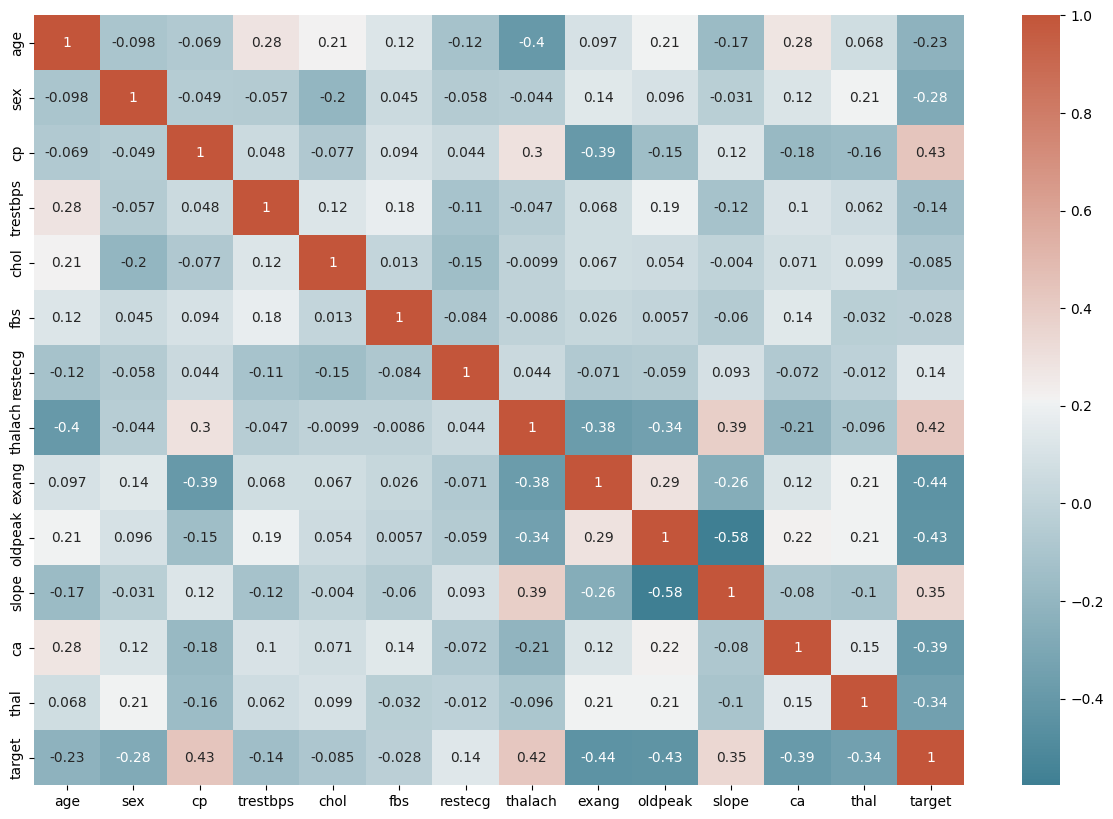

In [ ]:
# correlation matrix- correlation between all features

corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))



There is a positive correlation between chest pain (cp) & target (our predictor)--the greater amount of chest pain, greater chance of having heart disease.

We see a negative correlation between exercise induced angina (exang) & our predictor. Because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow.

In [ ]:
# Filtering data by POSITIVE Heart Disease patient
pos_data = data[data['target']==1]
pos_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
# Filtering data by NEGATIVE Heart Disease patient
neg_data = data[data['target']==0]
neg_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
print("(Positive Patients ST depression): " + str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['oldpeak'].mean()))

(Positive Patients ST depression): 0.583030303030303
(Negative Patients ST depression): 1.5855072463768116


In [ ]:
print("(Positive Patients thalach): " + str(pos_data['thalach'].mean()))
print("(Negative Patients thalach): " + str(neg_data['thalach'].mean()))


(Positive Patients thalach): 158.46666666666667
(Negative Patients thalach): 139.1014492753623


From comparing positive and negative patients we can see there are vast differences in avg for many of our 13 Features. Positive patients experience heightened maximum heart rate achieved (thalach) average.

----

2. Machine Learning + Predictive Analytics



preparing data for modeling, ASN (Assign,Split, Normalize).

In [ ]:
#Assign the 13 features to X, & the last column(target) to our classification predictor, y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
#Split: the data set into the Training set and Test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)


In [ ]:
#Normalize:Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Modeling /Training

We’ll Train various Classification Models on the Training set & see which yields the highest accuracy.

 We will compare the accuracy of Logistic Regression,  SVM (Support Vector Machine),Random Forest models.

In [ ]:
#Model 1: Logistic Regression

from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

#Accuracy 74%

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [ ]:
#Model 2: SVM (Support Vector Machine)

from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model2 = SVC(random_state=1) # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

#accuracy 75%

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [ ]:
#Model 3: Random Forest 🏆

from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(random_state=1)# get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

#accuracy 80%

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



From comparing the 3 models, we can conclude that Model 3: Random Forest yields the highest accuracy. With an accuracy of 80%. 

Precision, Recall, F1-score and Support:

Precision : be “how many are correctly classified among that class”

Recall : “how many of this class you find over the whole number of element of this class”

F1-score : harmonic mean of precision and recall values.

F1 score reaches its best value at 1 and worst value at 0.

F1 Score = 2 x ((precision x recall) / (precision + recall))

Support: # of samples of the true response that lie in that class.



In [ ]:
#confusion matrix-evaluates the perfomance of the classification model
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)


[[21  9]
 [ 3 28]]


0.8032786885245902

Confusion Matrix:

21 is the amount of True Positives in our data, while 28 is the amount of True Negatives.

9 & 3 are the number of errors.

There are 9 Type 1 errors (False Positives)- You predicted positive and it’s false.

There are 3 Type 2 errors (False Negatives)- You predicted negative and it’s false.

Hence, if we calculate the accuracy its *Correct Predicted* Total.

Accuracy =(21+28)/(21+28+9+3) = 0.80 = 80% accuracy

#Feature Importance



-a score that indicates how helpful each feature was in our model.

-The higher the Feature Score, the more that feature is used to make key decisions & thus the more important it is.

In [ ]:
# get importance
importance = model3.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.07814
Feature: 1, Score: 0.04206
Feature: 2, Score: 0.16580
Feature: 3, Score: 0.07477
Feature: 4, Score: 0.07587
Feature: 5, Score: 0.00828
Feature: 6, Score: 0.02014
Feature: 7, Score: 0.12772
Feature: 8, Score: 0.06950
Feature: 9, Score: 0.09957
Feature: 10, Score: 0.04677
Feature: 11, Score: 0.11667
Feature: 12, Score: 0.07473


<Axes: >

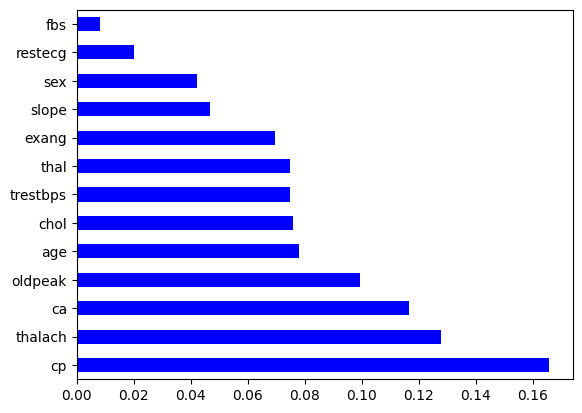

In [ ]:
index= data.columns[:-1]
importance = pd.Series(model3.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

From the Feature Importance graph above, we can conclude that the top 4 significant features were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak).

#Predictions

***Scenario:** A patient develops cardiac symptoms & you input his vitals into the Machine Learning Algorithm.

He is a 20 year old male, with a chest pain value of 2 (atypical angina), with resting blood pressure of 110.

In addition he has a serum cholestoral of 230 mg/dl.

He is fasting blood sugar > 120 mg/dl.

He has a resting electrocardiographic result of 1.

The patients maximum heart rate achieved is 140.

Also, he was exercise induced angina.

His ST depression induced by exercise relative to rest value was 2.2.

The slope of the peak exercise ST segment is flat.

He has no major vessels colored by fluoroscopy, and in addition his maximum heart rate achieved is a reversible defect.

Based on this information, can you classify this patient with Heart Disease?

In [ ]:
print(model3.predict(sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

#Outputs Binary 1 -> meaning Positive Diagnosis of Heart Disease

[1]


Predicting the Test set results:



In [ ]:
y_pred = model3.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#First value represents our predicted value, Second value represents our actual value.
#If the values match,then we predicted correctly.

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


We can see that our results are very accurate (80%) !



Conclusions


1. Our machine learning algorithm can now classify patients with Heart Disease. Now we can properly diagnose patients, & get them the help they needs to recover. By diagnosing detecting these features early, we may prevent worse symptoms from arising later.

2. Our Random Forest algorithm yields the highest accuracy, 80%. 